In [1]:
import pandas as pd 
import numpy as np
import pygam
import matplotlib.pyplot as plt

from pygam import LogisticGAM, s, f, l, te
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from tabulate import tabulate 

#### Remove One Record
In the test set, there is one record with 'p_age_first_offense' == 0. Removed

In [2]:
train_pd = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/broward/data/train.csv")
test_pd = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/broward/data/test.csv")
test_pd = test_pd[test_pd['p_age_first_offense'] != 0]

In [3]:
x_train, y_train = train_pd.values[:,:-1], train_pd.values[:,-1]
x_test, y_test = test_pd.values[:,:-1], test_pd.values[:,-1]

In [4]:
cols = train_pd.columns[:-1]

In [5]:
cols

Index(['sex', 'p_current_age', 'p_age_first_offense', 'p_charge', 'p_jail30',
       'p_prison', 'p_probation', 'p_juv_fel_count', 'p_felprop_violarrest',
       'p_murder_arrest', 'p_felassault_arrest', 'p_misdemassault_arrest',
       'p_famviol_arrest', 'p_sex_arrest', 'p_weapons_arrest',
       'fail_appear_two_yr', 'fail_appear_two_plus', 'current_violent',
       'current_violent20', 'pending_charge', 'prior_conviction_F',
       'prior_conviction_M', 'violent_conviction', 'total_convictions',
       'p_arrest', 'p_property', 'p_traffic', 'p_drug', 'p_dui', 'p_domestic',
       'p_stalking', 'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass'],
      dtype='object')

### 1. Default GAM

#### sex: categorical; others: splines

In [6]:
gam = LogisticGAM(f(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + f(9) + s(10) + s(11) + s(12)
                  + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24)
                   + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34)).fit(x_train, y_train)

In [7]:
gam.accuracy(x_train, y_train), gam.accuracy(x_test, y_test)

(0.7063339731285988, 0.6370967741935484)

#### Partial Dependence

- For each feature, we need to get integer values.

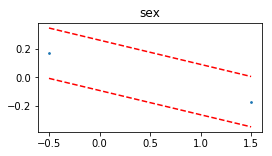

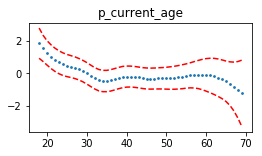

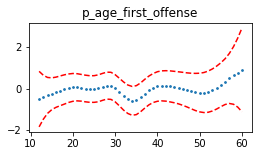

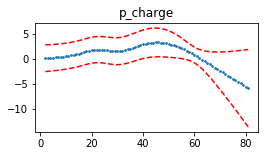

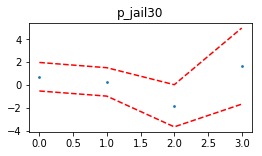

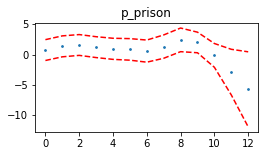

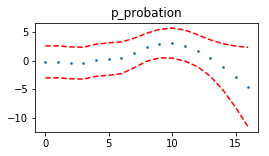

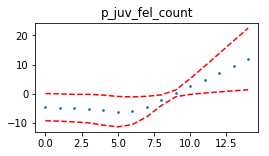

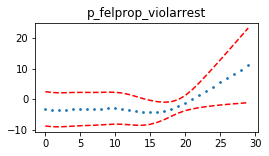

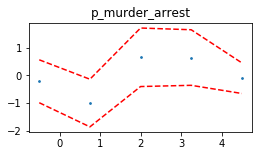

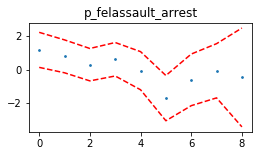

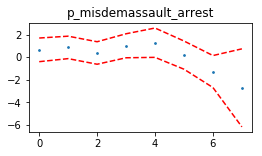

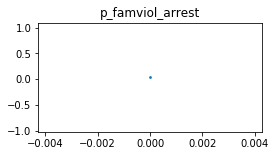

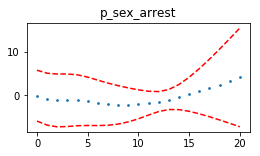

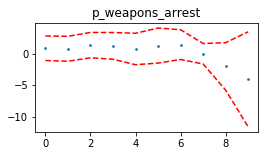

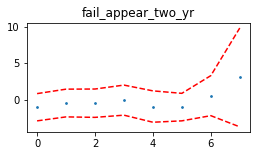

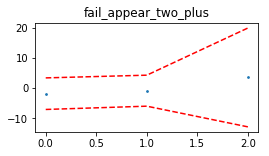

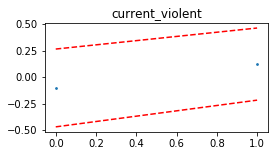

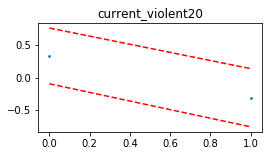

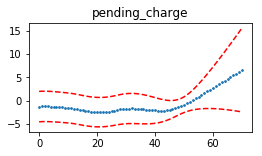

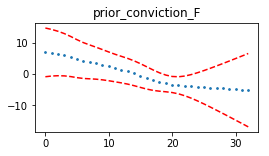

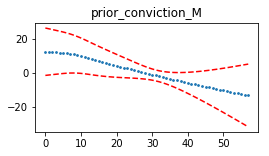

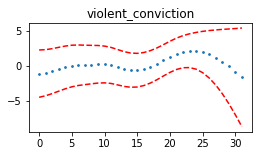

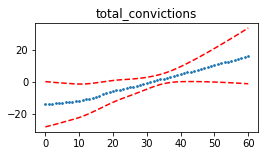

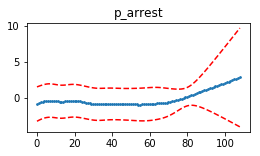

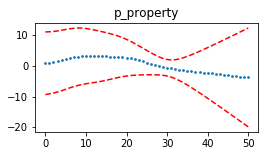

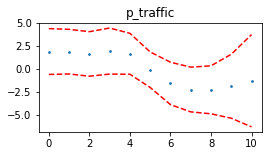

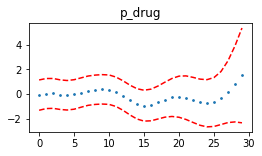

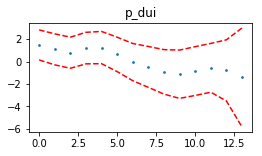

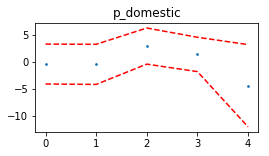

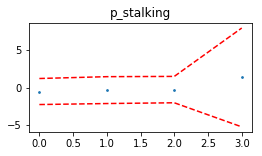

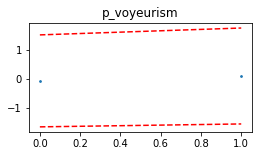

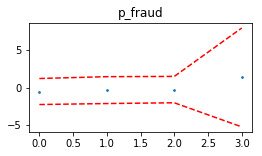

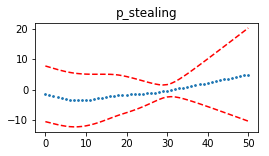

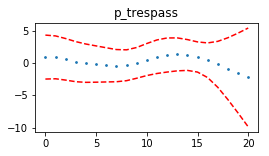

In [8]:
pdep = []

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    
    feature = x_train[:,i]
    upper, lower = np.max(feature), np.min(feature)
    XX = gam.generate_X_grid(term = i, n=(upper - lower + 1))
    
    pdep.append(gam.partial_dependence(term = i, X=XX, width=0.95)[0])
    confi = gam.partial_dependence(term = i, X=XX, width=0.95)[1]
    
    plt.figure(figsize = (4,2))
    
    plt.scatter(XX[:, term.feature], pdep[i], s= 3)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')

    #plt.plot(XX[:, term.feature], pdep[i])
    #plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(train_pd.columns[i])
    plt.show()

#### Cross Validation

In [9]:
combined = np.r_[train_pd, test_pd]
X, Y = combined[:,:-1], combined[:,-1]

0
1


C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


2
did not converge
3


C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWa

4


C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


5
6
7
did not converge
8


C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\binha\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWa

9


Text(0,0.5,'True Positive Rate')

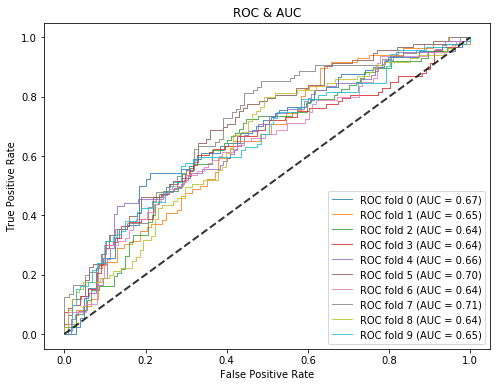

In [10]:
cv = KFold(n_splits=10, random_state=816, shuffle=True)
classifier = LogisticGAM(lam=20)
train_acc = []
test_acc = []

i = 0
plt.figure(figsize=(8,6))
for train, test in cv.split(X, Y):
    
    print(i)
    
    ## data & classifier
    X_train, Y_train = X[train], Y[train]
    X_test, Y_test = X[test], Y[test]
    model = classifier.fit(X_train, Y_train)
    
    train_acc.append(model.accuracy(X_train, Y_train))
    test_acc.append(model.accuracy(X_test, Y_test))
    prob = model.predict_proba(X_test)
    
    ## compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.8, 
             label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], lw=2, linestyle = '--',color='black',alpha=.8)
plt.title("ROC & AUC")
plt.legend(loc = "lower right")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [11]:
np.mean(train_acc), np.mean(test_acc)

(0.6698246055983502, 0.6170370172533518)